# Importing Libraries

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt


# Loading the dataset

In [10]:

file_path = "https://raw.githubusercontent.com/madalasaisindhu/-classification-of-stars-/refs/heads/main/star_classification.csv" # Replace with the correct file path
data = pd.read_csv(file_path)


# Showing the data

In [11]:
data

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [12]:
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [13]:
data.tail()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470
99999,1.237661e+18,196.896053,49.464643,22.62171,21.79745,20.60115,20.00959,19.28075,3650,301,4,60,8.343152e+18,GALAXY,0.542944,7410,57104,851


# Information about the dataset

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

# Descriptive Statistics

In [15]:
data.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


# Checking Null values

In [16]:
data.isnull()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
data.isnull().sum()

,0
obj_ID,0
alpha,0
delta,0
u,0
g,0
r,0
i,0
z,0
run_ID,0
rerun_ID,0


# Drop unnecessary columns

In [18]:

columns_to_drop = ['obj_ID', 'spec_obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'plate', 'MJD', 'fiber_ID']
data = data.drop(columns=columns_to_drop)


# Encode the target variable

In [19]:

label_encoder = LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])  # Encode class (e.g., Galaxy, Star, Quasar)


# Split features and target

In [20]:

X = data.drop(columns=['class'])
y = data['class']


# Scale features

In [21]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Train-test split

In [22]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Class distribution

<ipython-input-23-6e1b828791e3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['class'], palette='viridis')


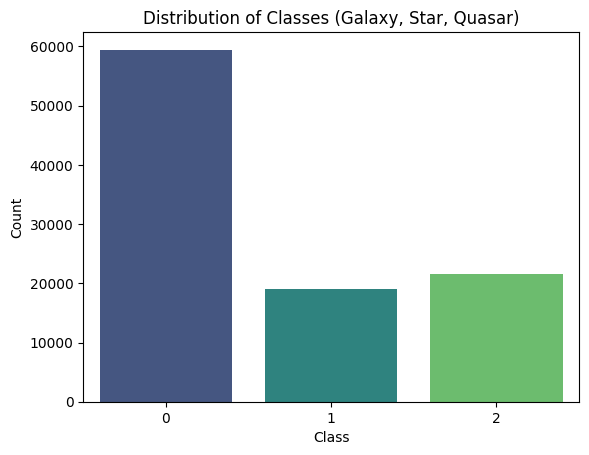

In [23]:

sns.countplot(x=data['class'], palette='viridis')
plt.title("Distribution of Classes (Galaxy, Star, Quasar)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

#  Pairplot of magnitudes (u, g, r, i, z)

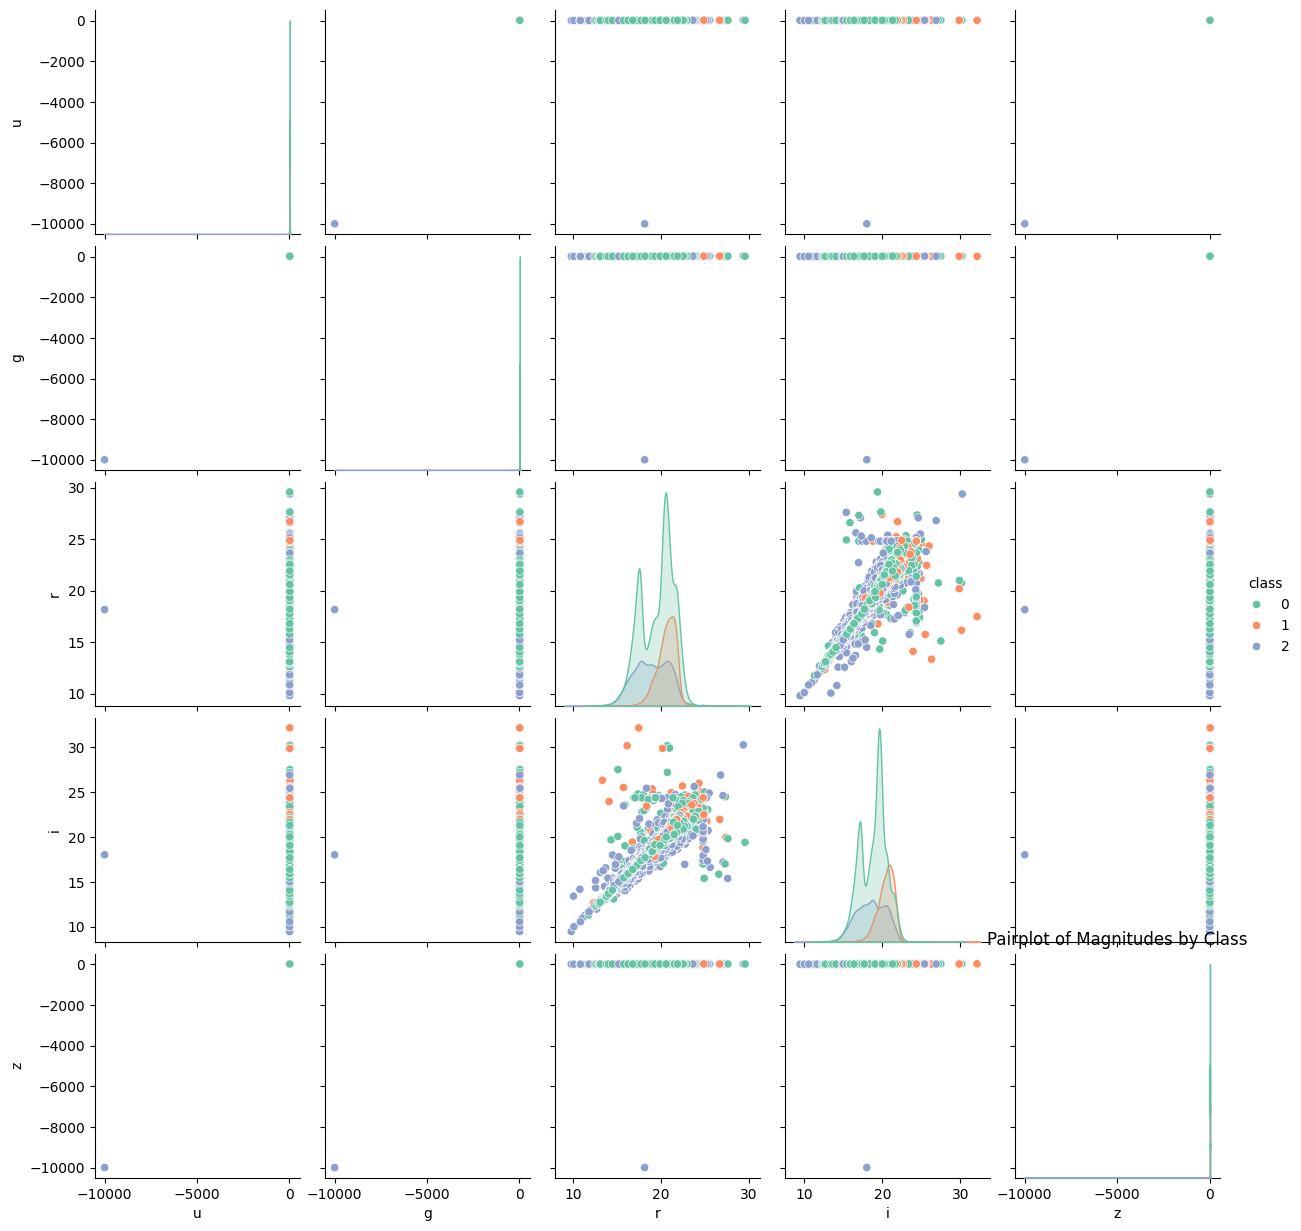

In [24]:

sns.pairplot(data[['u', 'g', 'r', 'i', 'z', 'class']], hue='class', palette='Set2')
plt.title("Pairplot of Magnitudes by Class")
plt.show()

# Redshift distribution by class

<ipython-input-25-c4522788234b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='redshift', data=data, palette='coolwarm')


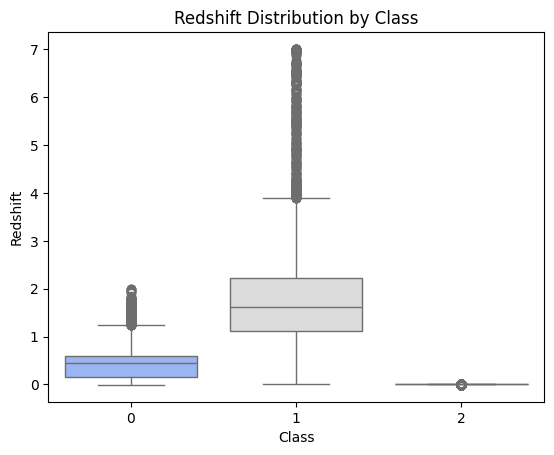

In [25]:

sns.boxplot(x='class', y='redshift', data=data, palette='coolwarm')
plt.title("Redshift Distribution by Class")
plt.xlabel("Class")
plt.ylabel("Redshift")
plt.show()

# Correlation heatmap

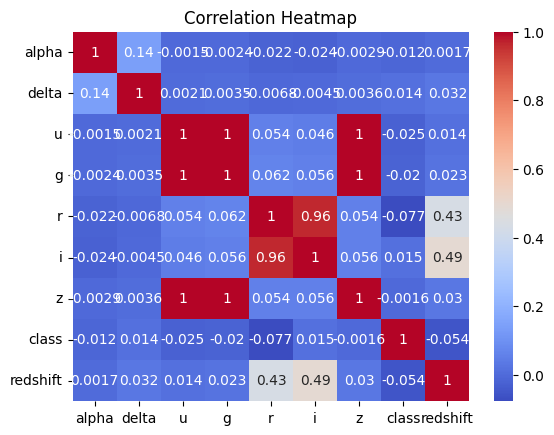

In [26]:

correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Distribution of Magnitude by Class

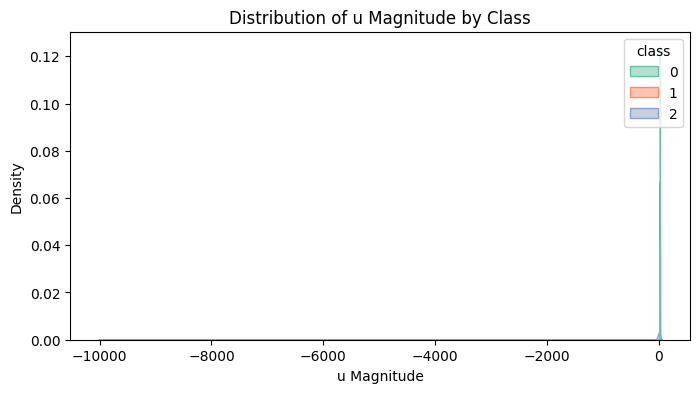

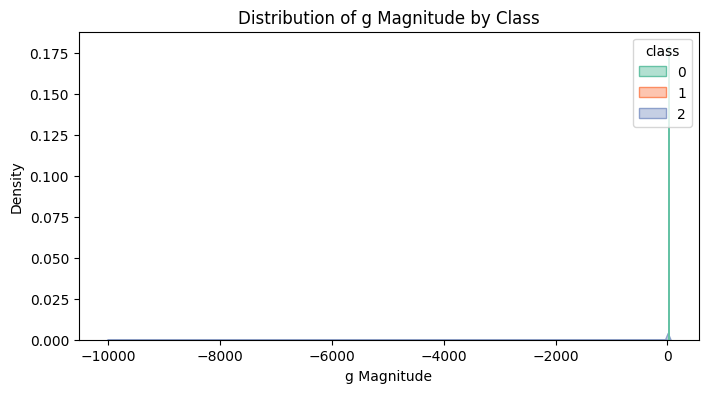

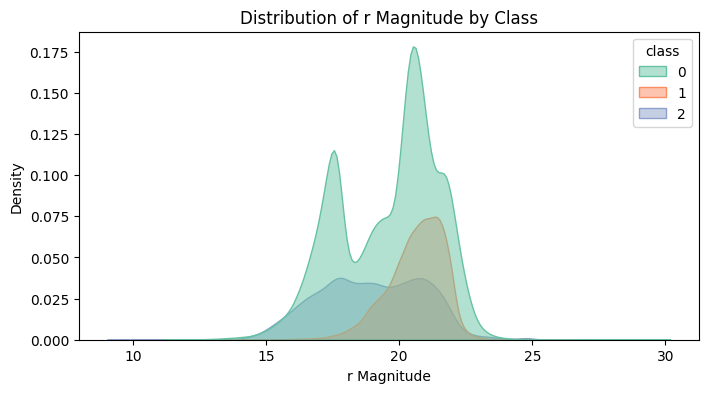

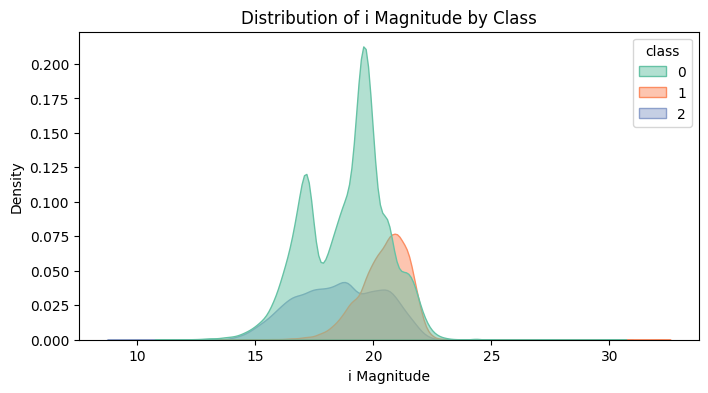

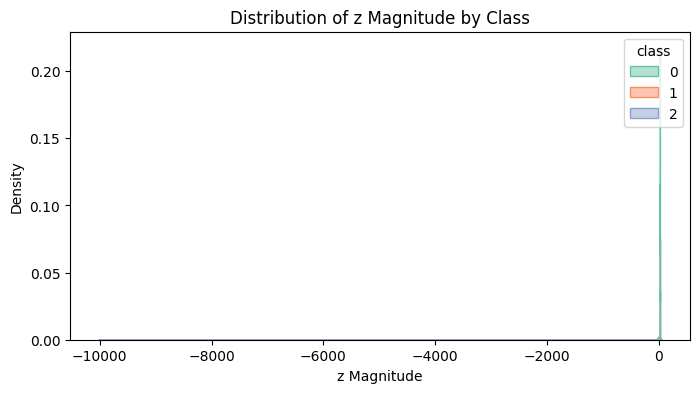

In [27]:
magnitude_columns = ['u', 'g', 'r', 'i', 'z']

for mag in magnitude_columns:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=data, x=mag, hue='class', fill=True, alpha=0.5, palette='Set2')
    plt.title(f"Distribution of {mag} Magnitude by Class")
    plt.xlabel(f"{mag} Magnitude")
    plt.ylabel("Density")
    plt.show()


# Scatter Matrix of Redshift and Magnitudes

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

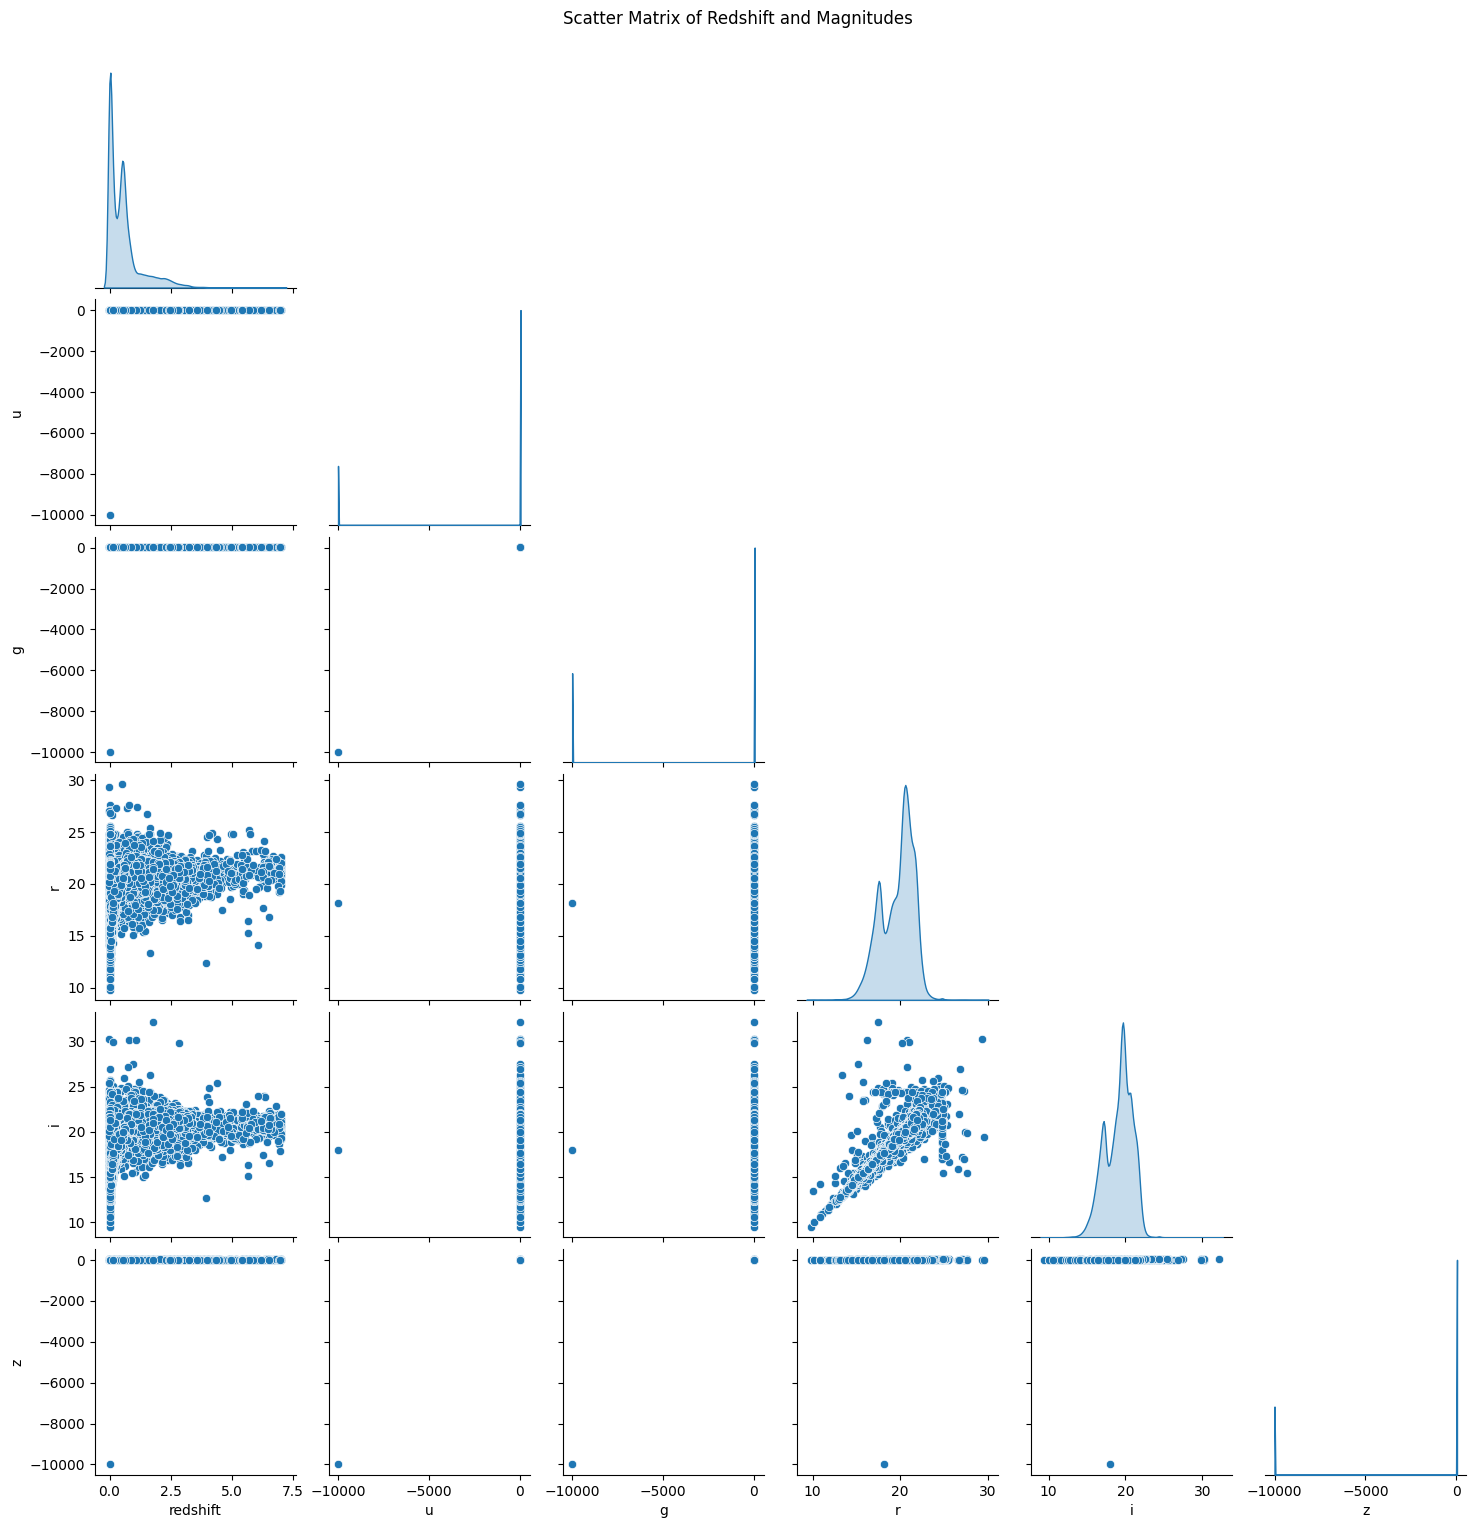

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Now you can use sns for plotting

# Scatterplot matrix for redshift and magnitudes
sns.pairplot(data[['redshift', 'u', 'g', 'r', 'i', 'z']], kind='scatter', diag_kind='kde', corner=True, palette='coolwarm')
plt.suptitle("Scatter Matrix of Redshift and Magnitudes", y=1.02)
plt.show()


# Class distribution across redshift ranges

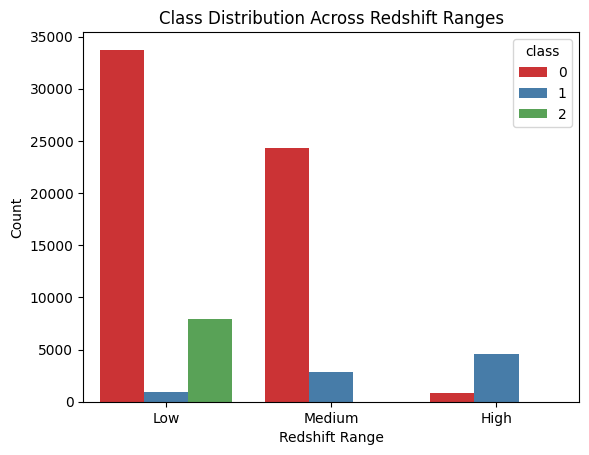

In [29]:

bins = [0, 0.5, 1.0, 1.5]
labels = ['Low', 'Medium', 'High']
data['redshift_range'] = pd.cut(data['redshift'], bins=bins, labels=labels)
sns.countplot(x='redshift_range', hue='class', data=data, palette='Set1')
plt.title("Class Distribution Across Redshift Ranges")
plt.xlabel("Redshift Range")
plt.ylabel("Count")
plt.show()

# Model Building

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Random Forest Classifier

In [31]:

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Support Vector Machine

In [32]:

svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)


SVC(kernel='linear', probability=True)

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score

In [35]:
# Evaluate Random Forest
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)


# Random Forest Accuracy

In [36]:
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.9772333333333333


# Random Forest Classification Report

In [37]:

print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     17845
           1       0.96      0.92      0.94      5700
           2       0.99      1.00      1.00      6455

    accuracy                           0.98     30000
   macro avg       0.98      0.97      0.97     30000
weighted avg       0.98      0.98      0.98     30000



In [38]:
# Evaluate SVM
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)


# SVM Accuracy

In [39]:
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.9589666666666666


# SVM Classification Report

In [41]:

print("SVM Classification Report:\n", classification_report(y_test, svm_predictions))


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97     17845
           1       0.95      0.87      0.91      5700
           2       0.96      1.00      0.98      6455

    accuracy                           0.96     30000
   macro avg       0.96      0.95      0.95     30000
weighted avg       0.96      0.96      0.96     30000



# Random Forest Confusion Matrix

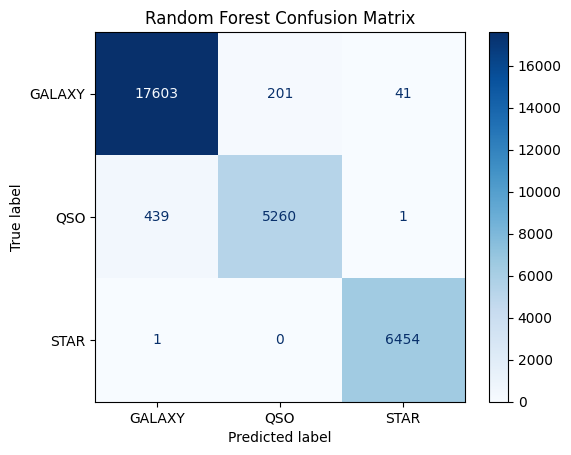

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay

# For Random Forest
cm_rf = confusion_matrix(y_test, rf_model.predict(X_test))
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=label_encoder.classes_)
disp_rf.plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

# SVM Confusion Matrix

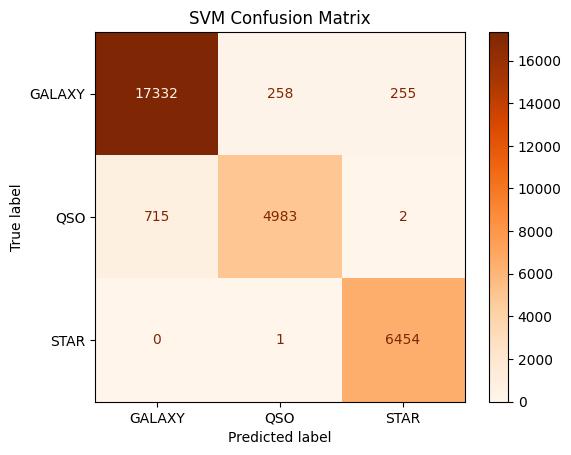

In [43]:
# For SVM
cm_svm = confusion_matrix(y_test, svm_model.predict(X_test))
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=label_encoder.classes_)
disp_svm.plot(cmap='Oranges')
plt.title("SVM Confusion Matrix")
plt.show()

# Neural Network Model Building

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Convert target to one-hot encoding for multi-class classification
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Define Neural Network architecture
nn_model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),  # Dropout for regularization
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(y_train_encoded.shape[1], activation='softmax')  # Output layer with softmax
])

# Compile the model
nn_model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Display model architecture
nn_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,587 (45.26 KB)

 Trainable params: 11,587 (45.26 KB)

 Non-trainable params: 0 (0.00 B)

# Training the Neural Network

In [45]:
# Train the model
history = nn_model.fit(X_train, y_train_encoded,
                       validation_data=(X_test, y_test_encoded),
                       epochs=50,
                       batch_size=32,
                       verbose=1)

# Save the model
nn_model.save('neural_network_model.h5')


Epoch 1/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8556 - loss: 0.3734 - val_accuracy: 0.9534 - val_loss: 0.1798
Epoch 2/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9513 - loss: 0.1535 - val_accuracy: 0.9648 - val_loss: 0.1292
Epoch 3/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9577 - loss: 0.1357 - val_accuracy: 0.9653 - val_loss: 0.1428
Epoch 4/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9619 - loss: 0.1278 - val_accuracy: 0.9617 - val_loss: 0.1586
Epoch 5/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9603 - loss: 0.1268 - val_accuracy: 0.9650 - val_loss: 0.1660
Epoch 6/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9629 - loss: 0.1215 - val_accuracy: 0.9672 - val_loss: 0.1645
Epoch 7/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9627 - loss: 0.1239 - val_accuracy: 0.9666 - val_loss: 0.2010
Epoch 8/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9623 - loss: 0.1246 

# Evaluation and Visualizations

In [46]:
print(data['class'].value_counts())


class
0    59445
2    21594
1    18961
Name: count, dtype: int64


In [47]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [50]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))
print(class_weights_dict)


{0: 0.5608974358974359, 1: 1.759545534524797, 2: 1.54127309157364}


In [51]:
history = nn_model.fit(X_train, y_train_encoded,
                       validation_data=(X_test, y_test_encoded),
                       epochs=50,
                       batch_size=32,
                       class_weight=class_weights_dict,
                       verbose=1)


Epoch 1/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9662 - loss: 0.1057 - val_accuracy: 0.9670 - val_loss: 1.1956
Epoch 2/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9645 - loss: 0.1043 - val_accuracy: 0.9706 - val_loss: 1.0693
Epoch 3/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9660 - loss: 0.1026 - val_accuracy: 0.9684 - val_loss: 0.9847
Epoch 4/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9638 - loss: 0.1042 - val_accuracy: 0.9681 - val_loss: 1.2116
Epoch 5/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9641 - loss: 0.1063 - val_accuracy: 0.9707 - val_loss: 1.1985
Epoch 6/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9645 - loss: 0.1037 - val_accuracy: 0.9660 - val_loss: 0.4967
Epoch 7/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9649 - loss: 0.1027 - val_accuracy: 0.9686 - val_loss: 0.8108
Epoch 8/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9644 - loss: 0.103

In [56]:
from sklearn.metrics import classification_report
y_true = np.argmax(y_test_encoded, axis=1)
y_pred_encoded = nn_model.predict(X_test)
y_pred = np.argmax(y_pred_encoded, axis=1)
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
              precision    recall  f1-score   support

      GALAXY       0.98      0.96      0.97     17845
         QSO       0.92      0.95      0.94      5700
        STAR       0.97      1.00      0.98      6455

    accuracy                           0.97     30000
   macro avg       0.96      0.97      0.96     30000
weighted avg       0.97      0.97      0.97     30000



In [57]:
# Predict classes
y_pred_encoded = nn_model.predict(X_test)
y_pred = np.argmax(y_pred_encoded, axis=1)
y_true = np.argmax(y_test_encoded, axis=1)


938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


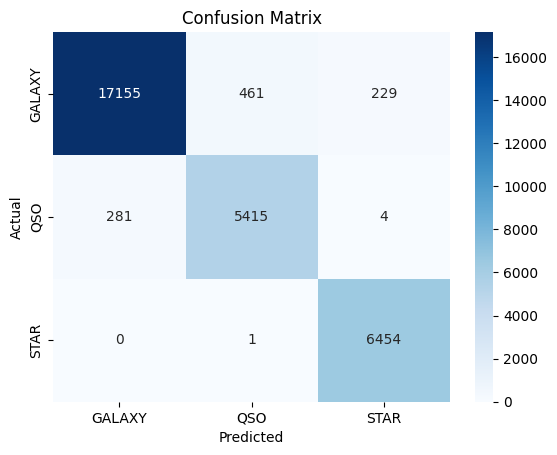

In [58]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Training History Visualization

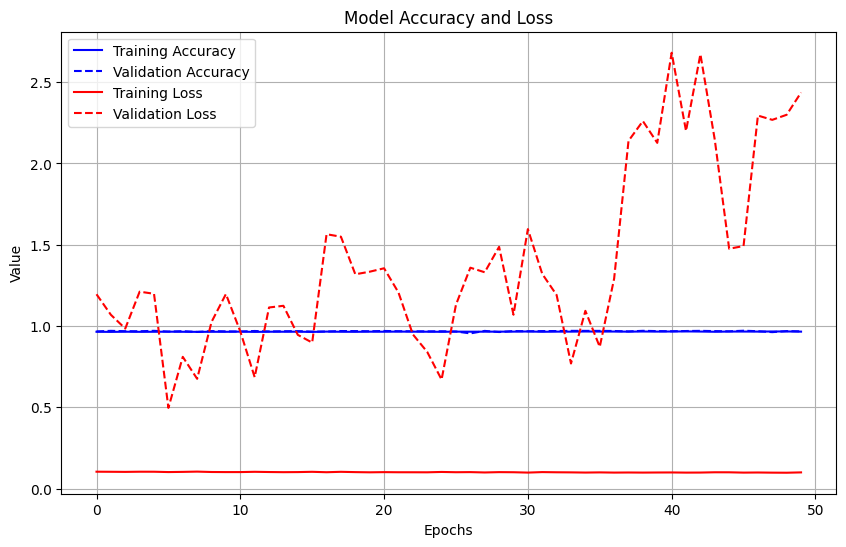

In [59]:

plt.figure(figsize=(10, 6))


plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='blue', linestyle='dashed')


plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red', linestyle='dashed')


plt.title('Model Accuracy and Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid(True)


plt.show()


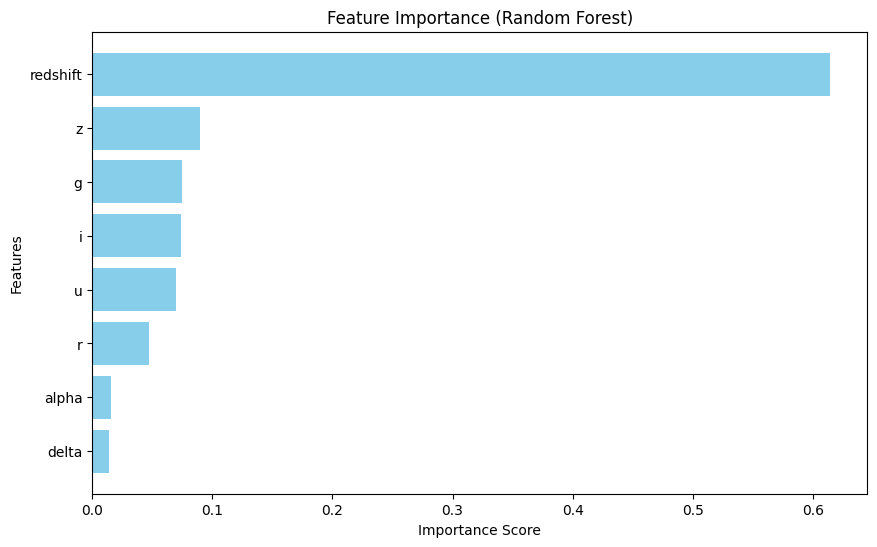

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Extract feature importance from Random Forest
feature_importances = rf_model.feature_importances_
features = data.drop(columns=['class']).columns

# Sort features by importance
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = features[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.gca().invert_yaxis()
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


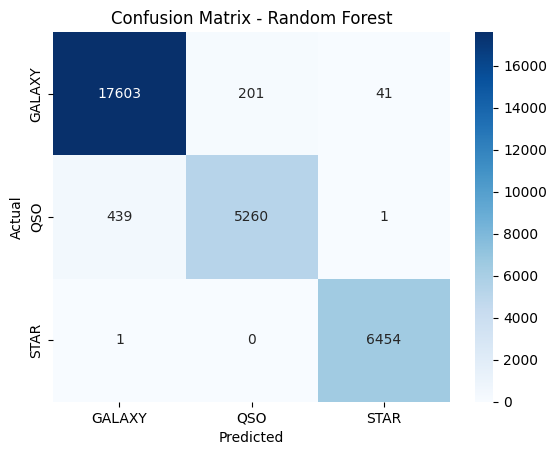

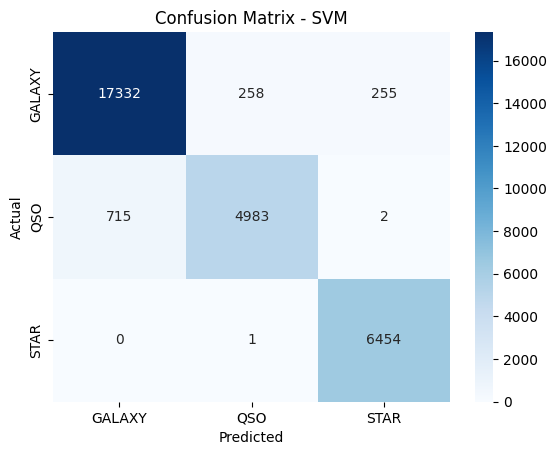

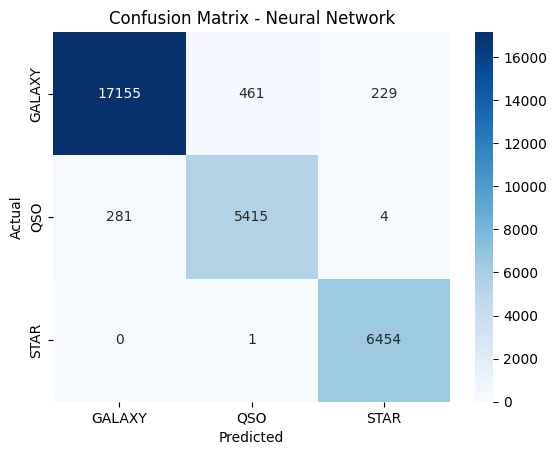

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to plot confusion matrix
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Plot for Random Forest
plot_conf_matrix(y_test, rf_predictions, "Confusion Matrix - Random Forest")

# Plot for SVM
plot_conf_matrix(y_test, svm_predictions, "Confusion Matrix - SVM")

# Plot for Neural Network
plot_conf_matrix(y_true, y_pred, "Confusion Matrix - Neural Network")


# Class Distribution by Model Predictions

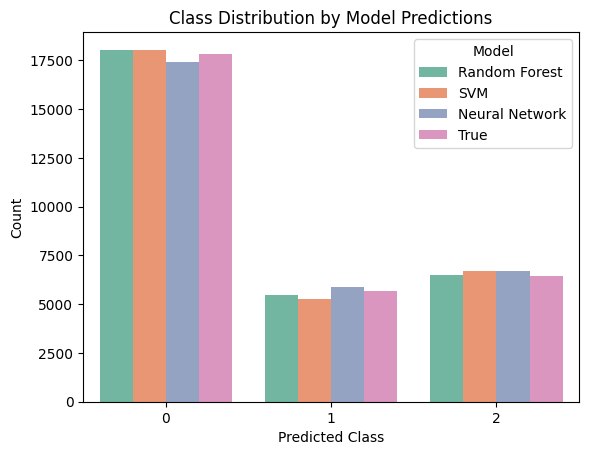

In [62]:
# Add predictions to a DataFrame for comparison
predictions_df = pd.DataFrame({
    'Random Forest': rf_predictions,
    'SVM': svm_predictions,
    'Neural Network': y_pred,
    'True': y_test
})

# Melt the DataFrame for visualization
melted = predictions_df.melt(var_name="Model", value_name="Predicted Class")

# Plot class distribution for each model
sns.countplot(data=melted, x="Predicted Class", hue="Model", palette="Set2")
plt.title("Class Distribution by Model Predictions")
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.legend(title="Model")
plt.show()
